Import libraries


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
# Sklearn provides various modules with a common API
from sklearn import svm, tree, neighbors, neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Read data from CSV

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
random.seed(100)
np.random.seed(100)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
train_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

test_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
test_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

train_nan_map = {'Age': train_data['Age'].mean(), 'Fare': train_data['Fare'].mean(), 'Embarked': train_data['Embarked'].mode()[0]}
test_nan_map = {'Age': test_data['Age'].mean(), 'Fare': test_data['Fare'].mean(), 'Embarked': test_data['Embarked'].mode()[0]}

train_data.fillna(value=train_nan_map, inplace=True)
test_data.fillna(value=test_nan_map, inplace=True)

train_data = pd.get_dummies(train_data, columns=['Embarked'], dtype=int)
test_data = pd.get_dummies(test_data, columns=['Embarked'], dtype=int)

train_data, test_data = train_data.align(test_data, join='left', axis=1, fill_value=0)

columns_map = {'Sex': {'male': 0, 'female': 1}}
train_data.replace(columns_map, inplace=True)
test_data.replace(columns_map, inplace=True)

X_train = train_data.loc[:, train_data.columns != 'Survived']
y_train = train_data.loc[:, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=10)


<ipython-input-5-bbc33c80ac9b>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace(columns_map, inplace=True)
<ipython-input-5-bbc33c80ac9b>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace(columns_map, inplace=True)


In [6]:
pd.set_option('display.width', 200)  # Increase max width
pd.set_option('display.max_columns', None)  # Show all columns
print(train_data.head(10))

             Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  Embarked_S
PassengerId                                                                                             
1                   0       3    0  22.000000      1      0   7.2500           0           0           1
2                   1       1    1  38.000000      1      0  71.2833           1           0           0
3                   1       3    1  26.000000      0      0   7.9250           0           0           1
4                   1       1    1  35.000000      1      0  53.1000           0           0           1
5                   0       3    0  35.000000      0      0   8.0500           0           0           1
6                   0       3    0  29.699118      0      0   8.4583           0           1           0
7                   0       1    0  54.000000      0      0  51.8625           0           0           1
8                   0       3    0   2.000000      3   

ML Algos dont get rid of random seed lines

In [7]:
#Ayush
random.seed(100)
np.random.seed(100)

from sklearn import linear_model
sgd_clf = linear_model.SGDClassifier(loss="modified_huber")
sgd_clf.fit(X_train.values, y_train.values)
print('linear_model:', sgd_clf.score(X_test.values, y_test.values))
y_pred1 = sgd_clf.predict(X_test.values)
y_truth1 = y_test.values

linear_model: 0.7830508474576271


In [8]:
#Josh
random.seed(100)
np.random.seed(100)

from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)
gb_clf.fit(X_train.values, y_train.values)
print('gradientboossing:', gb_clf.score(X_test.values, y_test.values))
y_pred2 = gb_clf.predict(X_test.values)
y_truth2 = y_test.values

gradientboossing: 0.8135593220338984


In [9]:
#Jonathan
random.seed(100)
np.random.seed(100)


In [10]:
#Lorien
random.seed(100)
np.random.seed(100)


In [11]:
#Ivan
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
test_data = test_data.drop(columns=["Survived"])

random.seed(100)
np.random.seed(100)


rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


y_pred = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


y_pred_final = rf_clf.predict(test_data)

submission = pd.DataFrame({"PassengerId": test_data.index, "Survived": y_pred_final})
submission.to_csv("submission.csv", index=False)

print("Submission file 'submission.csv' created! 🚀")

Random Forest Accuracy: 0.7966101694915254
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       191
           1       0.70      0.73      0.72       104

    accuracy                           0.80       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.80      0.80      0.80       295

Submission file 'submission.csv' created! 🚀


In [12]:
#Rithvik
random.seed(100)
np.random.seed(100)

In [16]:
#Abhi
random.seed(100)
np.random.seed(100)

from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes = (100, ),
                        activation = 'relu', solver = 'adam', random_state = 100, max_iter = 500)
mlp_clf.fit(X_train.values, y_train.values)
print('Neural Network - MLP: ', mlp_clf.score(X_test.values, y_test.values))
y_pred6 = mlp_clf.predict(X_test.values)
y_truth6 = y_test.values

Neural Network - MLP:  0.7796610169491526


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


uncomment your own truth and negative values and add lines of code for confusion matrix just copy the current one and change the number at the end

In [18]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_truth1, y_pred1).ravel() # Linear Model
tn2, fp2, fn2, tp2 = confusion_matrix(y_truth2, y_pred2).ravel() # Gradient Boost
#tn3, fp3, fn3, tp3 = confusion_matrix(y_truth3, y_pred3).ravel()
#tn4, fp4, fn4, tp4 = confusion_matrix(y_truth4, y_pred4).ravel()
#tn5, fp5, fn5, tp5 = confusion_matrix(y_truth5, y_pred5).ravel()
tn6, fp6, fn6, tp6 = confusion_matrix(y_truth6, y_pred6).ravel() #Neural Network - Multi Layer Perceptron
print("Confusion Matrix for Linear Model")
print(confusion_matrix(y_truth1, y_pred1, labels=[0, 1]))
print("Confusion Matrix for Gradient Boost")
print(confusion_matrix(y_truth2, y_pred2, labels=[0, 1]))
print("Confusion Matrix for Neural Network - Multi Layer Perceptron")
print(confusion_matrix(y_truth6, y_pred6, labels=[0, 1]))

Confusion Matrix for Linear Model
[[173  18]
 [ 46  58]]
Confusion Matrix for Gradient Boost
[[163  28]
 [ 27  77]]
Confusion Matrix for Neural Network - Multi Layer Perceptron
[[161  30]
 [ 35  69]]


[28, 18, 30]
[27, 46, 35]


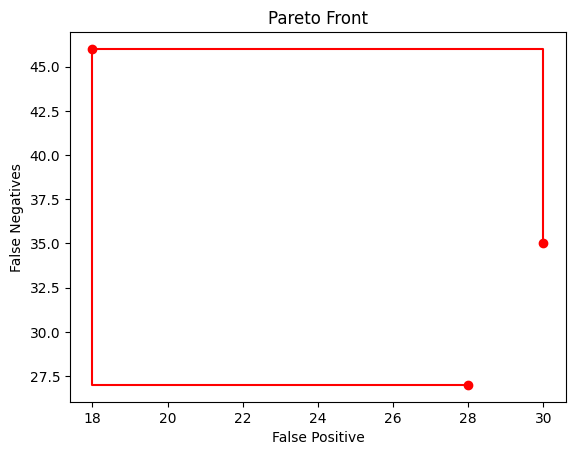

In [19]:
fitness_1 = [fp2, fp1, fp6] # when u add your algorithm add fp<number> into the list to plot the pareto front
fitness_2 = [fn2, fn1, fn6] # when u add your algorithm add fn<number> into the list to plot the pareto front
print(fitness_1)
print(fitness_2)

plt.scatter(fitness_1, fitness_2, color='r')
plt.plot(fitness_1, fitness_2, color='r', drawstyle='steps-post')
plt.xlabel("False Positive")
plt.ylabel("False Negatives")
plt.title("Pareto Front")
plt.show()

f1 = np.array(fitness_1)
f2 = np.array(fitness_2)